In [1]:
# Use Python to query the database and explore the relationship of different variables to models per gallon (mpg).
#  Find out which of the variables have high correlation with mpg. Report those values. 
# Build a regression model using one of those variables to predict mpg. Do the same using two of those variables.
#  Report your models along with the regression line equations. 

import pymysql.cursors
import pandas as pd
import statsmodels.api as sm
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#connecting to auto database with credentials
connection = pymysql.connect(host='localhost', user='root',
password='*******', db='auto', charset='utf8mb4',
cursorclass=pymysql.cursors.DictCursor)

In [3]:
cursor = connection.cursor()
sql = "SELECT mpg, cylinders, displacement, horsepower, weight, acceleration, `model year`, origin FROM mpg;" #Select all rows except the car name for numeric data
cursor.execute(sql)
df = pd.DataFrame(cursor.fetchall())
df['acceleration'] = pd.to_numeric(df['acceleration']) #acceleration was a string object and it was converted to a float
connection.close()

In [4]:
correlation_vals = df.corr()['mpg'].sort_values() #creates correlation table 
#The top four values are the values worth reporting with strong corrleations
print(correlation_vals[:4])

weight         -0.831535
displacement   -0.804304
horsepower     -0.777683
cylinders      -0.776796
Name: mpg, dtype: float64


Building regression model for weight and mpg since weight showed the strongest correlation

In [5]:
y=df['mpg'] #dependent var
X=df['weight'] #independent var
X = sm.add_constant(X) #adds constant value to our linear regression equation
print(X)

     const  weight
0      1.0    3504
1      1.0    3693
2      1.0    3436
3      1.0    3433
4      1.0    3449
..     ...     ...
387    1.0    2790
388    1.0    2130
389    1.0    2295
390    1.0    2625
391    1.0    2720

[392 rows x 2 columns]


In [6]:
lr_model = sm.OLS(y, X).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     874.0
Date:                Mon, 24 Nov 2025   Prob (F-statistic):          1.27e-101
Time:                        08:50:54   Log-Likelihood:                -1130.5
No. Observations:                 392   AIC:                             2265.
Df Residuals:                     390   BIC:                             2273.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2287      0.800     57.809      0.0

Linear Equation : mpg = -0.0076 * weight + 46.2287

In [7]:
#Creating a linear regression line for out plot
X_prime = np.linspace(X.weight.min(), X.weight.max(), 100)
#print(X_prime.shape)
X_prime_c = sm.add_constant(X_prime)
#Calculating predicted value
y_hat = lr_model.predict(X_prime_c)
#print(y_hat)

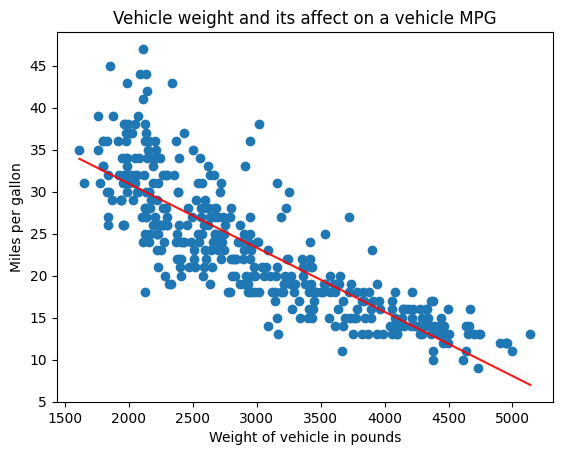

In [8]:
plt.scatter(X.weight,y)
plt.xlabel("Weight of vehicle in pounds")
plt.ylabel("Miles per gallon")
plt.title("Vehicle weight and its affect on a vehicle MPG")
plt.plot(X_prime, y_hat, 'red', alpha=0.9);

The reflection of the plot shows that the negative correlation of -0.83 between weight and mpg is accurate. This makes sense because the heavier the weight of the vehicle the more gas is needed to power the vehicle to drive. This in turn uses more gas, and therefore reduces the miles per gallon a vehicle can travel.  

In [9]:
y = df['mpg']
X = df['displacement']
X = sm.add_constant(X)

lr_model=sm.OLS(y,X).fit()
print(lr_model.summary())
print(lr_model.params)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     714.5
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           3.46e-90
Time:                        08:50:54   Log-Likelihood:                -1156.9
No. Observations:                 392   AIC:                             2318.
Df Residuals:                     390   BIC:                             2326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           35.1477      0.495     70.999   

Regression line for displacement: mpg = -0.06 * displacement + 35.1477

R-squared of 0.64 shows that about 64 percent of the variance in mpg displacement relationship is explained for the model.

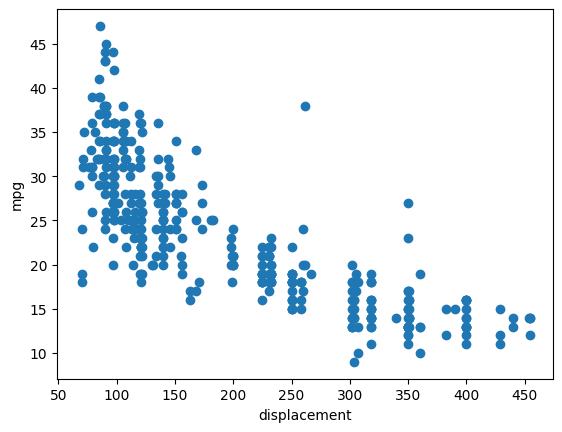

In [10]:
plt.figure()
plt.scatter(df['displacement'],df['mpg'])
plt.xlabel('displacement')
plt.ylabel('mpg');

In [11]:
y = df['mpg']
X = df['horsepower']
X = sm.add_constant(X)

lr_model=sm.OLS(y,X).fit()
print(lr_model.summary())
print(lr_model.params)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     596.8
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           1.25e-80
Time:                        08:50:55   Log-Likelihood:                -1179.0
No. Observations:                 392   AIC:                             2362.
Df Residuals:                     390   BIC:                             2370.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9558      0.718     55.642      0.0

Regression line for horsepower: mpg = -0.1576 * horsepower + 39.9558

R-squared 0f 0.605 is slightly worse than the variance of displacement and mpg

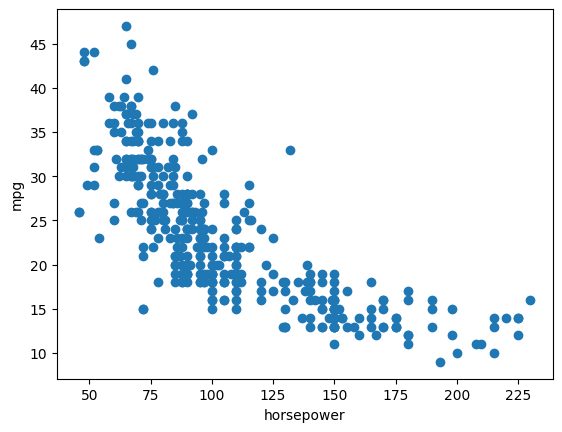

In [12]:
plt.figure()
plt.scatter(df['horsepower'],df['mpg'])
plt.xlabel('horsepower')
plt.ylabel('mpg');

In [13]:
y = df['mpg']
X = df[['displacement', 'horsepower']]
X = sm.add_constant(X)

lr_model=sm.OLS(y,X).fit()

print(lr_model.summary())
print(lr_model.params)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     382.7
Date:                Mon, 24 Nov 2025   Prob (F-statistic):           1.33e-92
Time:                        08:50:55   Log-Likelihood:                -1147.8
No. Observations:                 392   AIC:                             2302.
Df Residuals:                     389   BIC:                             2313.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           37.4947      0.729     51.456   

Regression line: mpg = -0.04 * displacement + -0.05 * horsepower + 37.4947

In [14]:
from mpl_toolkits.mplot3d import Axes3D

In [15]:
X_axis, Y_axis = np.meshgrid(np.linspace(X.displacement.min(), X.displacement.max(), 100) , 
                             np.linspace(X.horsepower.min(), X.horsepower.max(), 100))

In [16]:
Z_axis = lr_model.params.iloc[0] + lr_model.params.iloc[1] * X_axis + lr_model.params.iloc[2] * Y_axis

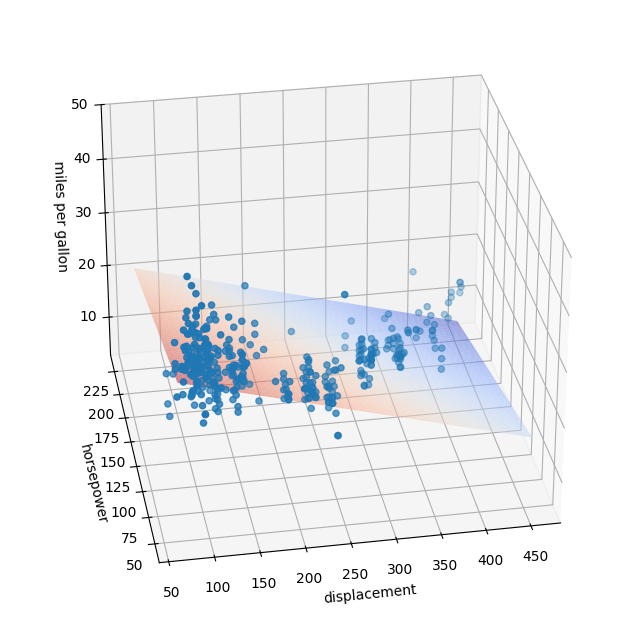

In [34]:
fig = plt.figure(figsize= (12, 8))

ax = fig.add_subplot(111, projection='3d', azim=-100) #asked microsoft copilot to help me display a 3-d plane


ax.plot_surface(X_axis, Y_axis, Z_axis, cmap=plt.cm.coolwarm, alpha=0.5, linewidth=0)
ax.scatter(X.displacement, X.horsepower, y)
ax.set_xlabel('displacement')
ax.set_ylabel('horsepower')
ax.set_zlabel('miles per gallon');

The 3-d graphs are interesting and visuallly appealing, but they are a little difficult to interpret in my opinion. It seems that the coolwarm hyperlane shows that the red area has a lot of the data points for both displacement and horsepower. Anything outside the colored hyperlane seems to be an outlier fo the dataset. It is easy to confirm that a lot of the vehicles in this dataset have between 10-20 miles per gallon and have a displacemnt of around 125 with horsepower in the 200s range.  